In [36]:
import sys
sys.path.append("..")
from stable_baselines3 import PPO


from simulation import simulate_policy
from evaluation.evaluator import Evaluator

In [37]:
model = PPO.load("../../src/results_final/03_9-1_duopoly/model.zip")

In [38]:
import config

config.customers_types = ['seasonal', 'price-aware']
config.customer_mix = [0.9, 0.1]
config.competitor = True

In [39]:
infos = simulate_policy(model)
infos = {key: value[config.episode_length // 2:] for key, value in infos.items()}

Plot the monopoly trajectories with the first line and the duopoly trajectories with the second line.

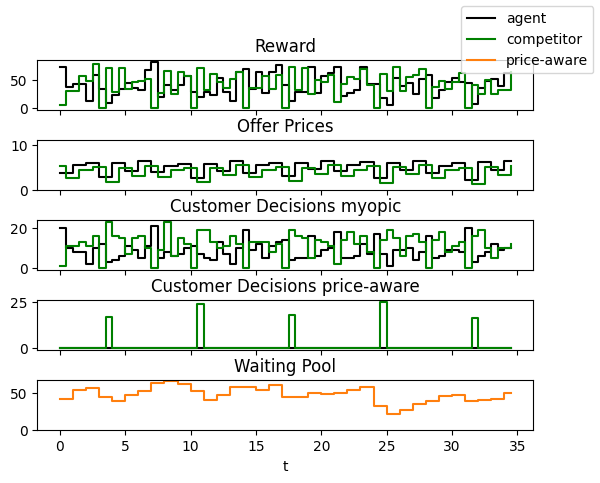

In [47]:
#Evaluator().plot_trajectories(infos, show=True)
Evaluator().plot_competition_one_picture(infos, show=True)

Save the monopoly trajectories with the first line and the duopoly trajectories with the second line.

In [41]:
#Evaluator().plot_trajectories(infos, save="e4_monopoly")
# Evaluator().plot_competition_one_picture(infos, save="e3_duopoly")

## Price Development during Training

Plot the price development during training by pasting the prices of the output file 'data.txt' executing the code below.

In [42]:
import matplotlib.pyplot as plt
import numpy as np

import config

for s in [3, 5, 6]:
    x = np.arange(25000, step=50)
    plt.plot(x, prices[s]['mean'][:len(prices[s]['mean'])//2], label=s)

plt.legend()

plt.title('Offer Prices per season')
plt.xlabel("Training Episodes")
plt.ylabel("Mean Offer Price")

plt.tight_layout()

#plt.show()
plt.savefig(f'prices_seasons')
plt.close()